Cell data type: <class 'numpy.ndarray'>
Original Image Shape: (1080, 1920, 3)


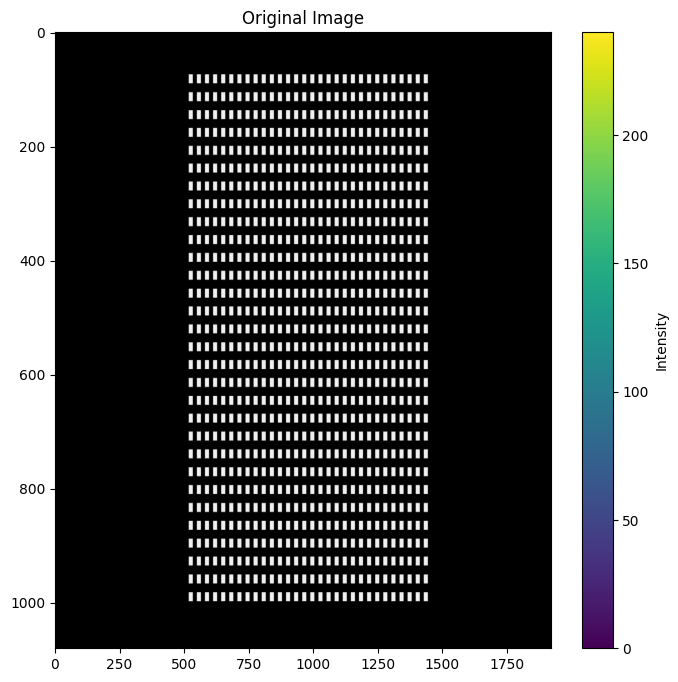

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.00645587787028].


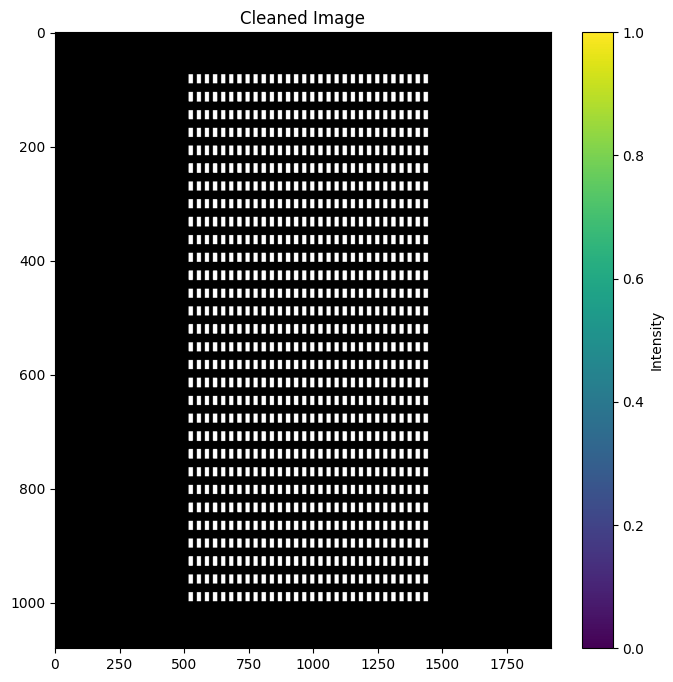

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preparation import load_pickle_data, twod_fft_mag, twod_inv_fft

# Path to the pickle file
file_path = 'cube_grid_top_data.pkl'

def custom_load_pickle(file_path):
    """
    Custom wrapper to load the pickle file and handle it as-is.
    """
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        if isinstance(data, pd.DataFrame):
            return data
        else:
            raise ValueError("Loaded data is not a DataFrame.")
    except Exception as e:
        print(f"Error loading pickle data: {e}")
        return pd.DataFrame()  # Return empty DataFrame on failure

try:
    # Load the data
    raw_data = custom_load_pickle(file_path)

    if not raw_data.empty:
        # Extract the single cell
        cell_data = raw_data.iloc[0, 0]
        print(f"Cell data type: {type(cell_data)}")

        # Convert cell data to NumPy array
        if isinstance(cell_data, np.ndarray):
            image_data = cell_data
        else:
            image_data = np.array(cell_data)

        print(f"Original Image Shape: {image_data.shape}")

        # Display the original image
        plt.figure(figsize=(8, 8))
        plt.imshow(image_data, cmap='viridis', aspect='auto')
        plt.title("Original Image")
        plt.colorbar(label='Intensity')
        plt.show()

        # Clean the image using Fourier Transform
        fft_magnitude = twod_fft_mag(image_data)  # Perform 2D FFT

        # Filter out low-intensity frequencies
        threshold = 10  # Adjust based on your data
        fft_magnitude_cleaned = np.where(np.abs(fft_magnitude) < threshold, 0, fft_magnitude)

        # Reconstruct the cleaned image
        cleaned_image = twod_inv_fft(fft_magnitude_cleaned)

        # Display the cleaned image
        plt.figure(figsize=(8, 8))
        plt.imshow(cleaned_image, cmap='viridis', aspect='auto')
        plt.title("Cleaned Image")
        plt.colorbar(label='Intensity')
        plt.show()

    else:
        print("The loaded data is empty.")
except Exception as e:
    print(f"An error occurred: {e}")
